<a href="https://colab.research.google.com/github/ani98622/NLP-assignments/blob/main/AniketMDS202308_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Aniket Tiwari
Roll No. MDS202308

- To download the dataset remotely


In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1PVA5IR4bAn7RulAeuSgxRBNMtmRGXaUm&export=download&authuser=0

Downloading...
From (original): https://drive.google.com/uc?id=1PVA5IR4bAn7RulAeuSgxRBNMtmRGXaUm
From (redirected): https://drive.google.com/uc?id=1PVA5IR4bAn7RulAeuSgxRBNMtmRGXaUm&confirm=t&uuid=715243c5-9207-4d0c-8925-afd679b74b53
To: /content/pdf_json.zip
100% 1.00G/1.00G [00:18<00:00, 54.5MB/s]


In [ ]:
!unzip /content/pdf_json.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/pdf_json/3b5991e96cfa54d22456ca94240ddf6b33df128c.json  
  inflating: /content/data/pdf_json/3b652f3519b6bc766449fca7e779b5be6a6d9bec.json  
  inflating: /content/data/pdf_json/3b9607b3be52a30ce188385904c7c23a5c43db8c.json  
  inflating: /content/data/pdf_json/3bc18d98ac38dba59de9d6c588b7af9c88c05300.json  
  inflating: /content/data/pdf_json/3bde3557017d639cff7b80c422cb81c21089d350.json  
  inflating: /content/data/pdf_json/3c0d36a7ae4ecbf30785d7af26f9081d514428d7.json  
  inflating: /content/data/pdf_json/3c514e106f83d8bef5d9a54572444908f6efb892.json  
  inflating: /content/data/pdf_json/3c6a914359faf991fe816c1b206df22a106beaf2.json  
  inflating: /content/data/pdf_json/3c959ff84cea2975a7310bdd8df44dfd3f7b2e44.json  
  inflating: /content/data/pdf_json/3caa083f1cf4b9bdb3c513ff190e43dbcd55cd8f.json  
  inflating: /content/data/pdf_json/3cc514c3c13f51ed3edf906154923af99274137c.json  
  inflating: /content/dat

- Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from nltk.probability import FreqDist
from tqdm import tqdm
import json,nltk,glob, gc, os, re
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

- Mandatory Downloads

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- Get all the filenames in folder

In [ ]:
def get_all_files_in_folder(folder_path):
    files = glob.glob(f"{folder_path}/*")
    files = [f for f in files if os.path.isfile(f)]
    return files

folder_path = '/content/data/pdf_json'
file_names = get_all_files_in_folder(folder_path)

len_files = len(file_names)
print("Total no. of files : ",len_files)

Total no. of files :  56528


- To extract the text from json files kept in the folder

In [ ]:
def json2text(filename):
  body_text = ""
  abstract = ""
  title = ""
  with open(filename,'r') as file:
    paper_content = json.load(file)

  if 'title' in paper_content:
    title = paper_content['title']

  if 'metadata' in paper_content:
    if 'title' in paper_content['metadata']:
      title = title +  paper_content['metadata']['title']

  if 'abstract' in paper_content:
    for abs in paper_content['abstract']:
      abstract = abstract + abs['text']

  if 'body_text' in paper_content:
    for bt in paper_content['body_text']:
      body_text = body_text + bt['text']

  return title + " " + abstract + " " + body_text

- Raw Text

In [ ]:
def write_file(filename):
  if filename.endswith('.json'):
    text_content = json2text(filename)
    with open('text.txt', 'a') as out_file:
      out_file.write(text_content + '\n')

from tqdm import tqdm
for filename in tqdm(file_names):
  write_file(filename)

100%|██████████| 56528/56528 [03:29<00:00, 269.92it/s]


-  Make a copy in drive : To avoid re-execution of same code as text file vanishes when runtime is lost.

In [ ]:
import shutil

source_path = '/content/text.txt'
destination_path = '/content/drive/MyDrive/text.txt'

shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/text.txt'

- Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess the input text by:
    - Converting to lowercase
    - Removing URLs
    - Removing punctuation and irrelevant characters
    - Removing text patterns like [16]
    - Removing Roman numerals
    - Removing Standalone numbers
    - Removing double white spaces
    - Removing stop words
    - Filtering out words with length <= 1
    - Handling hyphens appropriately
    - Removing patterns with numbers preceding or following letters
    """
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)

    # Remove irrelevant characters
    text = re.sub(r'[^\w\s-]', '', text)  # Removes @ # $ % ^ & * and similar

    # Remove text patterns like [16]
    text = re.sub(r'\[\d+\]', '', text)

    # Remove Roman numerals
    text = re.sub(r'\b[iivxlc]+\b', '', text, flags=re.IGNORECASE)

    # Remove Standalone numbers
    text = re.sub(r'\b\d+\b', '', text)

    # Remove double white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Replace hyphens in hyphenated words with spaces (e.g., "COVID-19" -> "COVID 19")
    text = re.sub(r'\b(\w+)-(\w+)\b', r'\1 \2', text)

    # Remove hyphens at the beginning or end of words
    text = re.sub(r'\b-+|-+\b', '', text)         # -file -> file

    # Remove hyphenated words where either part is a single character
    text = re.sub(r'\b[a-zA-Z]-[a-zA-Z]\b', '', text)  # Remove patterns like "a-b"

    # Remove patterns with numbers preceding or following letters (e.g., "7d", "d7", "6c")
    text = re.sub(r'\b\d+[a-zA-Z]|\b[a-zA-Z]\d+\b', '', text)  # Remove patterns like "7d", "d7", "7c"

    # Tokenize
    words = word_tokenize(text)

    # Remove stop words and filter short words
    processed_words = [word for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(processed_words)


### Methodology :
In order to avoid the memory crash in colab, executed in document by document fashion as the 'text.txt' contains text from each document separated by '\n', preprocessed it, and wrote in 'processed_words.txt' in the similar fashion.

In [ ]:
# len_files = total no. of files = no. of break lines in the text file

def process_file(file_path, output_file_path):
    with open(file_path, 'r') as file, open(output_file_path, 'a') as output_file:
        for line in tqdm(range(len_files), desc="Processing lines"):
            line = file.readline()
            text = preprocess_text(line)
            word_tokens = word_tokenize(text)
            output_file.write(' '.join(word_tokens) + '\n')

file_path = '/content/text.txt'
output_file_path = '/content/processed_words.txt'

process_file(file_path, output_file_path)

Processing lines: 100%|██████████| 56528/56528 [49:44<00:00, 18.94it/s]


- Kept a copy in drive to avoid losing & recomputing

In [ ]:
import shutil

source_path = '/content/processed_words.txt'
destination_path = '/content/drive/MyDrive/processed_words.txt'

shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/processed_words.txt'

## Order of Steps in preprocessing

- Converting to lowercase
- Removing URLs
- Removing punctuation and irrelevant characters
- Removing text patterns like [16]
- Removing Roman numerals
- Removing Standalone numbers
- Removing double white spaces
- Handling hyphens appropriately
- Removing patterns with numbers preceding or following letters
- Removing stop words
- Filtering out words with length <= 2

- Zipf's Law Implementation

## Zipf's Law

**Formula:**

$$
f_r \propto \frac{1}{r^a}
$$

$$f_r = \frac{c}{r^a}$$



Where:

* `f_r` is the frequency of the word with rank `r`.
* `c` is constant.
* `r` is the rank of the word (1 for the most frequent, 2 for the second most frequent, etc.).
* `a` is an exponent that typically falls between 1 and 2.


1 - Without Weighted Frequency

In [ ]:
# Reset pandas display option to default (remove custom float formatting)
pd.reset_option('display.float_format')

In [ ]:
def process_file_and_calculate_frequencies(file_path, total_lines):
    word_counts = Counter()
    total_words = 0

    with open(file_path, 'r') as file:
        for i in tqdm(range(total_lines), desc="Processing lines"):

            line = file.readline()
            words = line.strip().split()
            word_counts.update(words)
            total_words += len(words)

    heading = ['Word', 'Frequency']
    tf_list = [(word, count) for word, count in word_counts.items()]

    df_wt_freq = pd.DataFrame(tf_list, columns=heading)
    df_wt_freq = df_wt_freq.sort_values(by='Frequency', ascending=False)
    df_wt_freq.reset_index(drop=True, inplace=True)
    df_wt_freq.index.name = 'Rank'

    return df_wt_freq,total_words

file_path = '/content/drive/MyDrive/processed_words.txt'
total_lines = len_files   # total no. of files
df_wt_freq, total_words = process_file_and_calculate_frequencies(file_path, total_lines)

df_wt_freq = df_wt_freq.reset_index()
df_wt_freq.head()

Processing lines: 100%|██████████| 56528/56528 [01:15<00:00, 753.46it/s]


,Rank,Word,Frequency
0,0,patients,728044
1,1,cells,491532
2,2,also,476988
3,3,covid,470791
4,4,may,451156


In [ ]:
df_wt_freq = df_wt_freq[(df_wt_freq['Rank'] > 0) & (df_wt_freq['Frequency'] > 0)]

ranks = np.array(df_wt_freq['Rank']).reshape(-1, 1)
frequencies = np.array(df_wt_freq['Frequency'])

log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# fitting Linear Regression of log-log scale of ranks and frequencies to find 'alpha'.
model = LinearRegression().fit(log_ranks, log_frequencies)

alpha = -model.coef_[0]
intercept = model.intercept_

predicted_frequencies = np.exp(model.predict(log_ranks))

df_wt_freq['predicted_frequency'] = predicted_frequencies

print(f'Slope (alpha): {alpha}')

df_wt_freq.head()

Slope (alpha): 1.2371699544202608


,Rank,Word,Frequency,predicted_frequency
1,1,cells,491532,3.516531e+07
2,2,also,476988,1.491726e+07
3,3,covid,470791,9.033048e+06
4,4,may,451156,6.327962e+06
5,5,virus,408331,4.801420e+06


- Graph Plotting

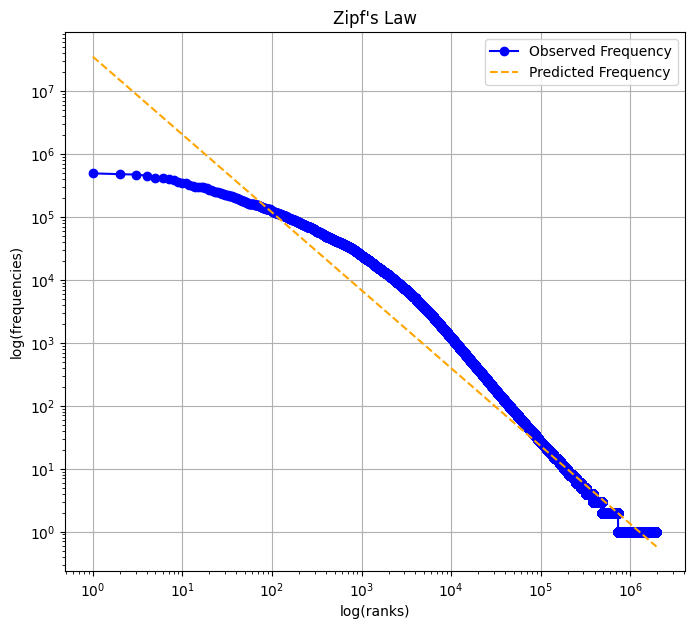

In [ ]:
(ranks, frequency) = (df_wt_freq['Rank'], df_wt_freq['Frequency'])

plt.figure(figsize=(8,7))
plt.plot(ranks, frequency, marker='o', color='blue', label='Observed Frequency')
plt.plot(ranks, df_wt_freq['predicted_frequency'], linestyle='--', color='orange', label='Predicted Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(ranks)')
plt.ylabel('log(frequencies)')
plt.legend(loc='best')
plt.title("Zipf's Law")
plt.grid(True)
plt.show()

2 - With Weighted Frequency

- 'process_file_and_calculate_frequencies' has been tweaked to store weighted frequency

In [ ]:
def process_file_and_calculate_frequencies(file_path, total_lines):
    word_counts = Counter()
    weighted_word_counts = Counter()
    total_words = 0

    with open(file_path, 'r') as file:
        for i in tqdm(range(total_lines), desc="Processing lines"):
            line = file.readline()
            words = line.strip().split()
            unique_words = set(words)
            num_unique_words = len(unique_words)

            word_counts.update(words)
            if num_unique_words > 0:
                for word in words:
                    weighted_word_counts[word] += 1 / num_unique_words

            total_words += len(words)

    heading = ['Word', 'Frequency', 'Weighted Frequency']
    tf_list = [(word, word_counts[word], weighted_word_counts[word]) for word in word_counts]

    df_wt_freq = pd.DataFrame(tf_list, columns=heading)
    df_wt_freq = df_wt_freq.sort_values(by='Weighted Frequency', ascending=False)
    df_wt_freq.reset_index(drop=True, inplace=True)
    df_wt_freq.index.name = 'Rank'

    return df_wt_freq, total_words

file_path = '/content/drive/MyDrive/processed_words.txt'
total_lines = len_files   # total no. of files
df_wt_freq, total_words = process_file_and_calculate_frequencies(file_path, total_lines)

df_wt_freq = df_wt_freq.reset_index()

Processing lines: 100%|██████████| 56528/56528 [02:59<00:00, 314.66it/s]


- Weighted Frequency :

In [ ]:
df_wt_freq = df_wt_freq[(df_wt_freq['Rank'] > 0) & (df_wt_freq['Weighted Frequency'] > 0)]

# weighted_freq are used despite normal frequencies
ranks = np.array(df_wt_freq['Rank']).reshape(-1, 1)
frequencies = np.array(df_wt_freq['Weighted Frequency'])

log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Fitted LR model to find 'alpha'
model = LinearRegression().fit(log_ranks, log_frequencies)

alpha = -model.coef_[0]
predicted_frequencies = np.exp(model.predict(log_ranks))
df_wt_freq['predicted_frequency'] = predicted_frequencies

print(f'Slope (alpha): {alpha}')

Slope (alpha): 1.5870783661274988


 - Plot for Weighted frequency

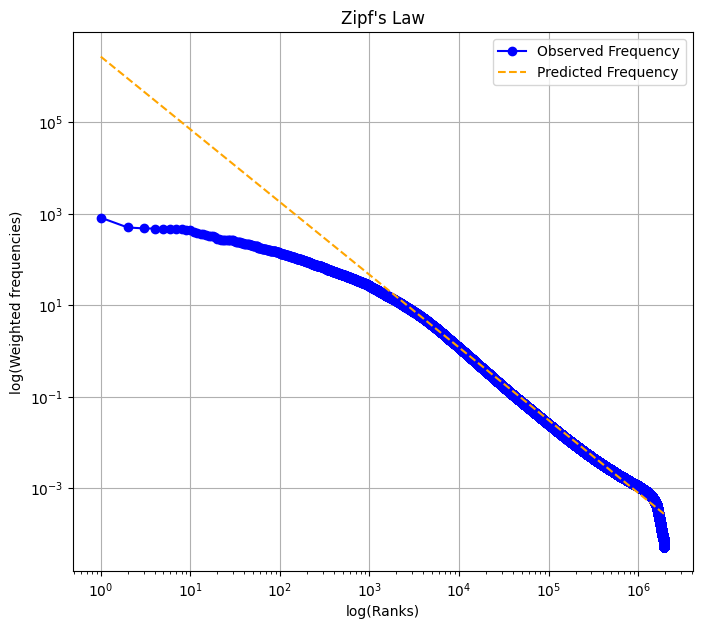

In [ ]:
(ranks, frequency) = (df_wt_freq['Rank'], df_wt_freq['Weighted Frequency'])

plt.figure(figsize=(8,7))
plt.plot(ranks, frequency, marker='o', color='blue', label='Observed Frequency')
plt.plot(ranks, df_wt_freq['predicted_frequency'], linestyle='--', color='orange', label='Predicted Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Ranks)')
plt.ylabel('log(Weighted frequencies)')
plt.legend(loc='best')
plt.title("Zipf's Law")
plt.grid(True)
plt.show()

- Token and vocab Size

In [ ]:
print( f"Vocabulary size : {(df_wt_freq.shape[0])}")
print( f"Tokens : {total_words}")

Vocabulary size : 1959773
Tokens : 130477751


- Heap's Law Implementation

In [ ]:
def process_file_and_update_vocab(file_path, increament):
    vocab = set()
    vocab_sizes = []
    token_counts = []

    total_tokens = 0
    current_tokens = []

    with open(file_path, 'r') as file:
        for line in tqdm(file, desc="Processing file"):
            words = line.strip().split()
            current_tokens.extend(words)
            total_tokens += len(words)

            while len(current_tokens) >= increament:
                chunk = current_tokens[:increament]
                current_tokens = current_tokens[increament:]
                vocab.update(chunk)
                token_counts.append(total_tokens)
                vocab_sizes.append(len(vocab))

        # Process any remaining tokens after reading the file
        if current_tokens:
            vocab.update(current_tokens)
            token_counts.append(total_tokens)
            vocab_sizes.append(len(vocab))

    df_vocab = pd.DataFrame({
        'Token Count': token_counts,
        'Vocabulary Size': vocab_sizes
    })

    return df_vocab

file_path = '/content/drive/MyDrive/processed_words.txt'
increament = 10000
df_vocab = process_file_and_update_vocab(file_path, increament)
df_vocab.head()

Processing file: 56528it [00:52, 1076.01it/s]


,Token Count,Vocabulary Size
0,11357,2977
1,22140,4962
2,30964,6541
3,41406,8555
4,51007,9744


## Heap's Law

**Formula:**

$$
M \propto {T^b}
$$

<p align="center">$M = kT^{b}$</p>

Where:

* **M:** The number of unique words.
* **T:** The total number of words.
* **k:** A constant.
* **b:** An exponent, typically between 0.5 and 1.0.

**Interpretation:**

* **Growth rate:** The number of unique words grows at a slower rate than the total number of words.
* **Exponent:** The exponent `b` determines the rate of growth. A higher `b` indicates a faster growth rate.

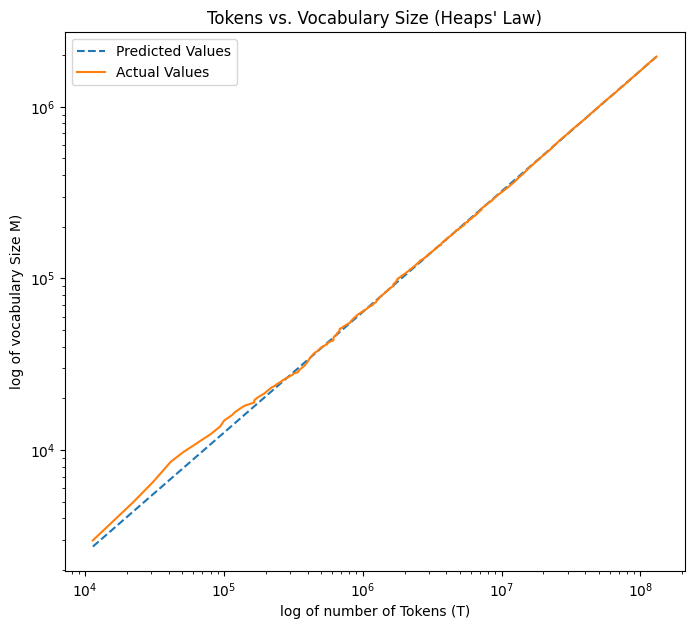

In [ ]:
token_counts = np.array(df_vocab['Token Count']).reshape(-1, 1)
vocab_sizes = np.array(df_vocab['Vocabulary Size'])

log_token_counts = np.log(token_counts)
log_vocab_sizes = np.log(vocab_sizes)

model = LinearRegression().fit(log_token_counts, log_vocab_sizes)
# slope_b = model.coef_[0]
# intercept_logk = model.intercept_
predicted_vocab_sizes = np.exp(model.predict(log_token_counts))

plt.figure(figsize=(8, 7))
plt.plot(token_counts, predicted_vocab_sizes, label="Predicted Values", linestyle='--')
plt.plot(token_counts, vocab_sizes, label="Actual Values", linestyle='-')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log of number of Tokens (T)')
plt.ylabel('log of vocabulary Size M)')
plt.title("Tokens vs. Vocabulary Size (Heaps' Law)")
plt.legend()
plt.show()